In [ ]:
#Task 3 - Customer Churn Prediction

In [3]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)


In [6]:
# load the datset
data   = pd.read_csv(r"C:\Users\Wintewarrior\Downloads\archive (2)\Churn_Modelling.csv")

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

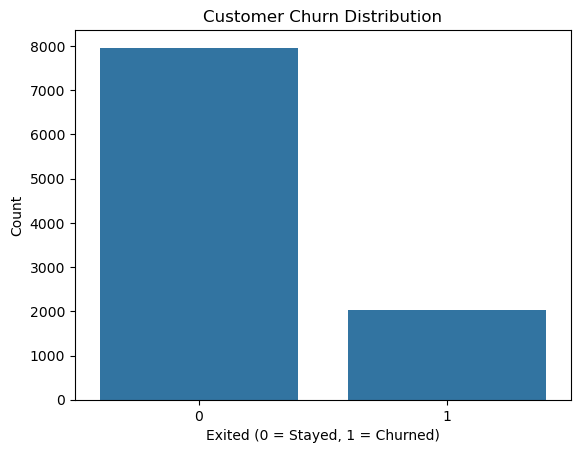

In [9]:
# Visualizations
sns.countplot(x='Exited', data=data)
plt.title("Customer Churn Distribution")
plt.xlabel("Exited (0 = Stayed, 1 = Churned)")
plt.ylabel("Count")
plt.show()


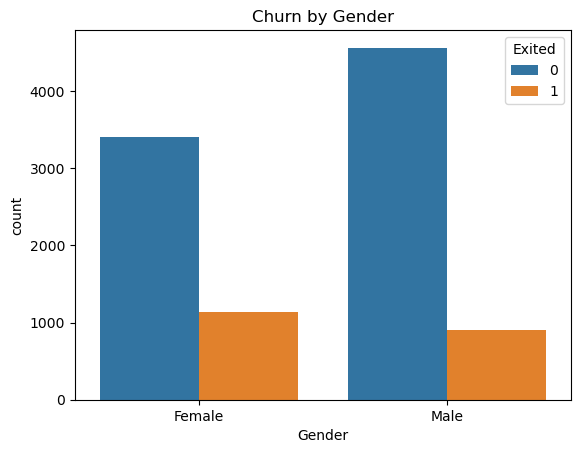

In [10]:
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title("Churn by Gender")
plt.show()


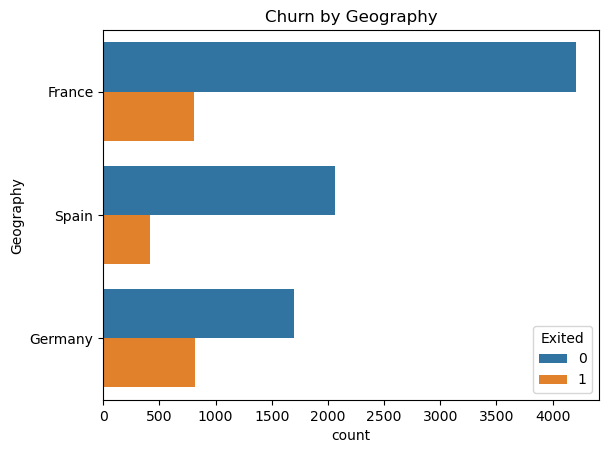

In [11]:
sns.countplot(y='Geography', hue='Exited', data=data)
plt.title("Churn by Geography")
plt.show()


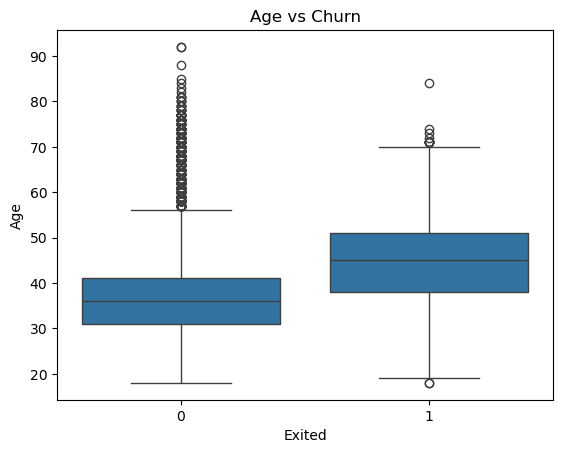

In [12]:
sns.boxplot(x='Exited', y='Age', data=data)
plt.title("Age vs Churn")
plt.show()


In [13]:
# Drop Irrelevant Columns
data.drop(
    columns=['RowNumber', 'CustomerId', 'Surname'],
    inplace=True
)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
X = data.drop('Exited', axis=1)
y = data['Exited']


In [16]:
categorical_cols = ['Geography', 'Gender']
numerical_cols = X.drop(columns=categorical_cols).columns


In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [19]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)

X_train_lr = preprocessor.fit_transform(X_train)
X_test_lr  = preprocessor.transform(X_test)

lr_model.fit(X_train_lr, y_train)

y_pred_lr = lr_model.predict(X_test_lr)


In [20]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.808
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [21]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train_lr, y_train)
y_pred_rf = rf_model.predict(X_test_lr)


In [22]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [23]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_lr, y_train)
y_pred_gb = gb_model.predict(X_test_lr)


In [24]:
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



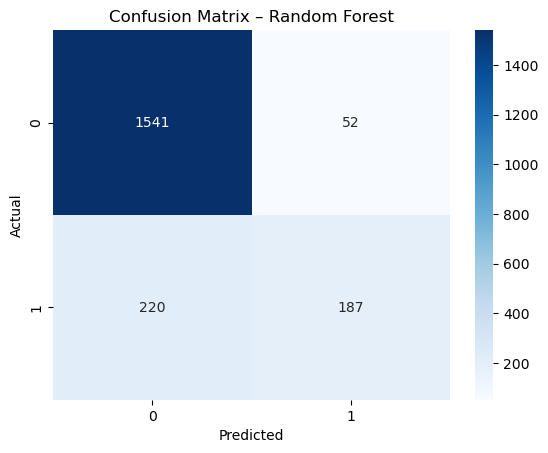

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()


In [26]:
y_prob = rf_model.predict_proba(X_test_lr)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ROC-AUC Score: 0.8522181657774878


In [ ]:
#CodSoft Internship Report
Task: Customer Churn Prediction

Intern Name: Mahendra Hanamant Bidarbhavikar
Internship Domain: Machine Learning
Organization: CodSoft
Task Title: Customer Churn Prediction
Programming Language: Python
Duration: 10 January 2026 - 10 February 2026

#Introduction
The objective of Task 3 was to develop a machine learning model to predict customer churn for a subscription-based business. 
Customer churn prediction helps organizations identify customers who are likely to leave and take proactive actions to improve retention and business performance.

#Dataset Description
The dataset consists of historical customer data containing demographic information and usage-related features. Important attributes include credit score, geography, gender, age, tenure, account balance, number of products, credit card ownership, activity status, and estimated salary.
The target variable Exited indicates whether a customer has churned (1) or remained with the company (0).

#Methodology
The data preprocessing phase involved removing irrelevant identifier columns, encoding categorical variables, and scaling numerical features. Exploratory Data Analysis (EDA) was performed to understand churn patterns across age, geography, gender, and account balance.
Three machine learning models were implemented:
* Logistic Regression
* Random Forest Classifier
* Gradient Boosting Classifier
These models were trained on the processed dataset and evaluated using standard performance metrics.

#Results and Evaluation
Model performance was evaluated using accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC score. Ensemble models such as Random Forest and Gradient Boosting performed better than Logistic Regression by capturing complex customer behavior patterns. 
Random Forest showed strong overall performance in predicting churn.

#Conclusion
This project successfully demonstrated the application of machine learning techniques for customer churn prediction. 
Proper data preprocessing and feature engineering played a crucial role in improving model accuracy. The developed model can help businesses identify at-risk customers and take timely retention measures. 
The task provided valuable hands-on experience with real-world data and predictive modeling.

#Tools & Technologies Used
* Python
* Pandas
* NumPy
* Matplotlib
* Seaborn
* Scikit-learn
* Jupyter Notebook